#Notebooks to analyze Baseball data 

In [144]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [145]:
data = pd.read_csv ('/Users/ruddirodriguez/Documents/python_jupyter/baseballdatabank-2019.2/core/AllstarFull.csv')

In [146]:
data.head ()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0


In [175]:
data.isnull().any()

playerID       False
yearID         False
gameNum        False
gameID          True
teamID         False
lgID           False
GP              True
startingPos     True
dtype: bool

In [147]:
filterBOS = data[["yearID","GP"]].loc[(data["teamID"]=="DET")]

In [63]:
filterBOS.tail ()

,yearID,GP
5219,2018,1.0
5227,2018,1.0
5228,2018,1.0
5242,2018,0.0
5246,2018,1.0


In [148]:
category_group_year=filterBOS.groupby(['yearID']).count()


In [149]:
category_group_year.head()

,GP
yearID,
1933,1
1934,3
1935,4
1936,4
1937,4


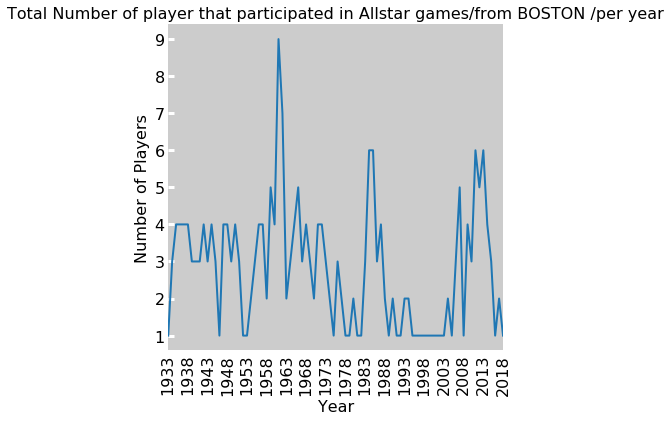

In [184]:
my_plot=plt.subplot(111) 
my_plot = category_group_year.unstack().plot(kind='line',title="Total Number of Players ",figsize=(6, 6),style='-', lw=2,legend=False)
my_plot.set_title ('Total Number of player that participated in Allstar games/from BOSTON /per year',fontsize=16)
my_plot.set_xlabel("Year",fontsize=16)
my_plot.set_ylabel("Number of Players",fontsize=16)
my_plot.set_xticks(np.arange(0,len(category_group_year.index),5))
my_plot.set_xticklabels(labels=category_group_year.index[np.arange(0,len(category_group_year.index),5)],rotation=90)
#my_plot.legend(["Number of players"], loc=9,ncol=4)
my_plot.set_facecolor((0.8, 0.8, 0.8))
my_plot.tick_params(axis='y',direction='in',length=6, width=3, colors='w',labelcolor='k',labelsize=16)
my_plot.tick_params(axis='x',direction='in',length=0, width=0, colors='w',labelcolor='k',labelsize=16)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()   

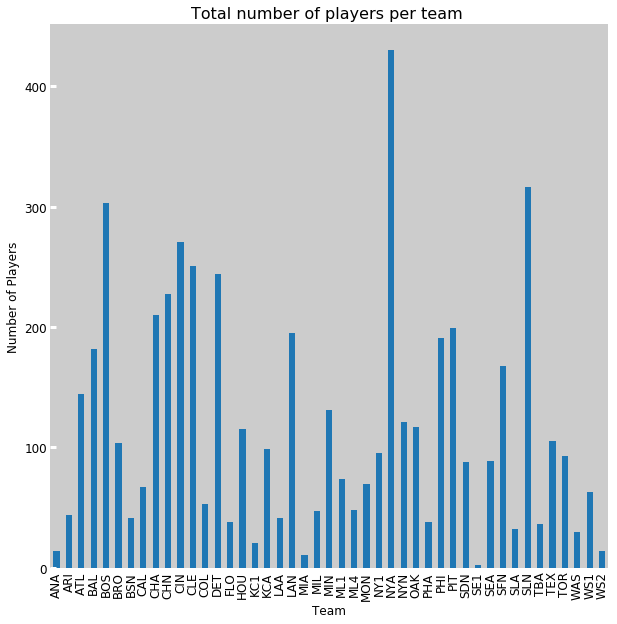

In [185]:
teamunique=data["teamID"].unique().tolist()
#datateamgp = data[["teamID","GP"]]
#category_groupteam=data[["teamID","GP"]].groupby(['teamID']).count()
my_plot=plt.figure (2)
my_plot = data[["teamID","GP"]].groupby(['teamID']).count().unstack().plot(kind='bar',figsize=(10, 10))
my_plot.set_title ('Total number of players per team ',fontsize=16)
my_plot.set_xlabel("Team",fontsize=12)
my_plot.set_ylabel("Number of Players",fontsize=12)
my_plot.set_xticklabels(labels=data[["teamID","GP"]].groupby(['teamID']).count().index)
my_plot.set_facecolor((0.8, 0.8, 0.8))
my_plot.tick_params(axis='y',direction='in',length=6, width=3, colors='w',labelcolor='k',labelsize=12)
my_plot.tick_params(axis='x',direction='in',length=0, width=0, colors='w',labelcolor='k',labelsize=12)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()  

In [176]:
people = pd.read_csv ('/Users/ruddirodriguez/Documents/python_jupyter/baseballdatabank-2019.2/core/People.csv')

Let s merge the data 

In [177]:
CubaAll = pd.merge(data,  people[['playerID','birthCountry','nameFirst','nameLast','nameGiven']].loc[(people['birthCountry']=='Cuba')], on=['playerID'], how='inner')

In [180]:
CubaAll.head ()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos,birthCountry,nameFirst,nameLast,nameGiven
0,marreco01,1951,0,ALS195107100,WS1,AL,0.0,NaN,Cuba,Connie,Marrero,Conrado Eugenio
1,minosmi01,1951,0,ALS195107100,CHA,AL,1.0,NaN,Cuba,Minnie,Minoso,Saturnino Orestes Armas
2,minosmi01,1952,0,NLS195207080,CHA,AL,1.0,NaN,Cuba,Minnie,Minoso,Saturnino Orestes Armas
3,minosmi01,1953,0,NLS195307140,CHA,AL,1.0,NaN,Cuba,Minnie,Minoso,Saturnino Orestes Armas
4,minosmi01,1954,0,ALS195407130,CHA,AL,1.0,7.0,Cuba,Minnie,Minoso,Saturnino Orestes Armas


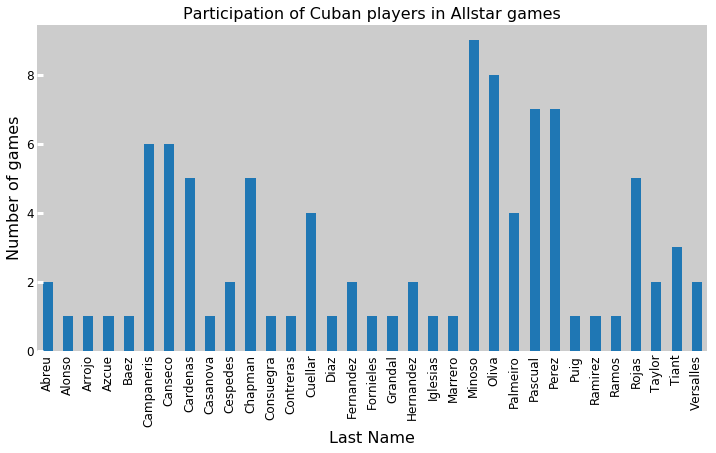

In [186]:
groupbynamegiven=CubaAll.groupby (['nameLast']).count()
my_plot=plt.figure (3)
my_plot = groupbynamegiven["GP"].plot(kind='bar',figsize=(12 ,6),style='r-', lw=2,legend=False)
my_plot.set_title("Participation of Cuban players in Allstar games",fontsize=16)
my_plot.set_xlabel("Last Name",fontsize=16)
my_plot.set_ylabel("Number of games",fontsize=16)
#my_plot.set_xticks(np.arange(0,len(category_group_year.index),10))
#my_plot.set_xticklabels(labels=category_group_year.index[np.arange(0,le,n(category_group_year.index),10)],rotation=90)
##my_plot.legend(["Number of players"], loc=9,ncol=4)
my_plot.set_facecolor((0.8, 0.8, 0.8))
my_plot.tick_params(axis='y',direction='in',length=6, width=3, colors='w',labelcolor='k',labelsize=12)
my_plot.tick_params(axis='x',direction='in',length=0, width=0, colors='w',labelcolor='k',labelsize=12)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

In [133]:

datateamgp = data[["teamID","yearID","GP"]]
category_groupteam=datateamgp.groupby(['yearID','teamID']).count()
my_plot=plt.figure (2)
my_plot = category_groupteam.unstack().plot(kind='line',figsize=(12, 12),legend=False,lw=3)
my_plot.set_title("Total Number of Players from each team that were sleceted  in the All Star  ",fontsize=16)
my_plot.set_xlabel("Team",fontsize=16)
my_plot.set_ylabel("Total Number of Players",fontsize=16)
my_plot.set_xticklabels(labels=category_group.index)
my_plot.set_facecolor((0.8, 0.8, 0.8))
my_plot.tick_params(axis='y',direction='in',length=6, width=3, colors='w',labelcolor='k',labelsize=16)
my_plot.tick_params(axis='x',direction='in',length=0, width=0, colors='w',labelcolor='k',labelsize=16)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [91]:
salaries = pd.read_csv("/Users/ruddirodriguez/Documents/python_jupyter/baseballdatabank-2019.2/core/Salaries.csv")

In [92]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


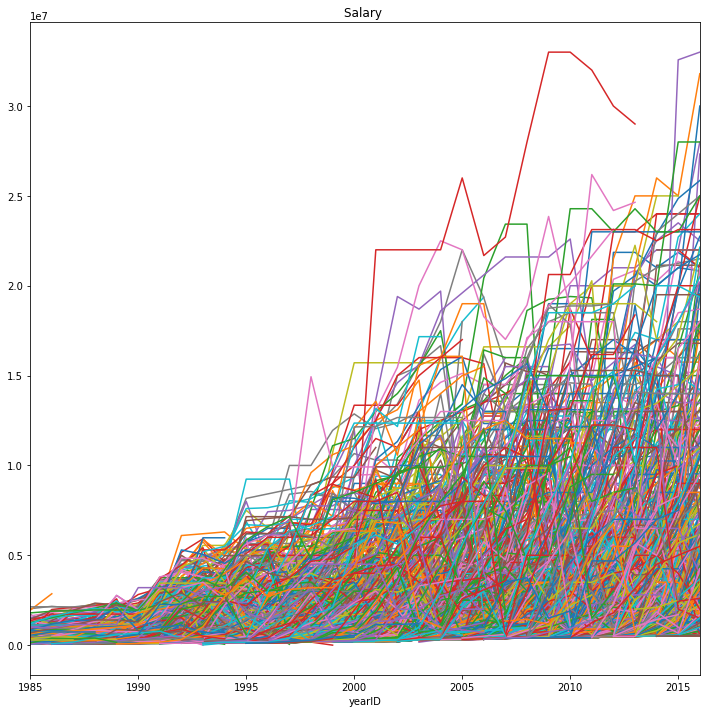

In [132]:
datatesa = salaries[["yearID","playerID","salary"]]
category_grouptsa=datatesa.groupby(['yearID','playerID']).sum()
my_plot=plt.figure (3)
my_plot = category_grouptsa.unstack().plot(kind='line',title="Salary ",figsize=(12, 12))

my_plot.get_legend().remove()


plt.show()